# Ensemble learning 

In [ ]:
#!pip install xgboost

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)

## Loding data

In [3]:
#Importing dataset
df= pd.read_csv("notebooks/data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


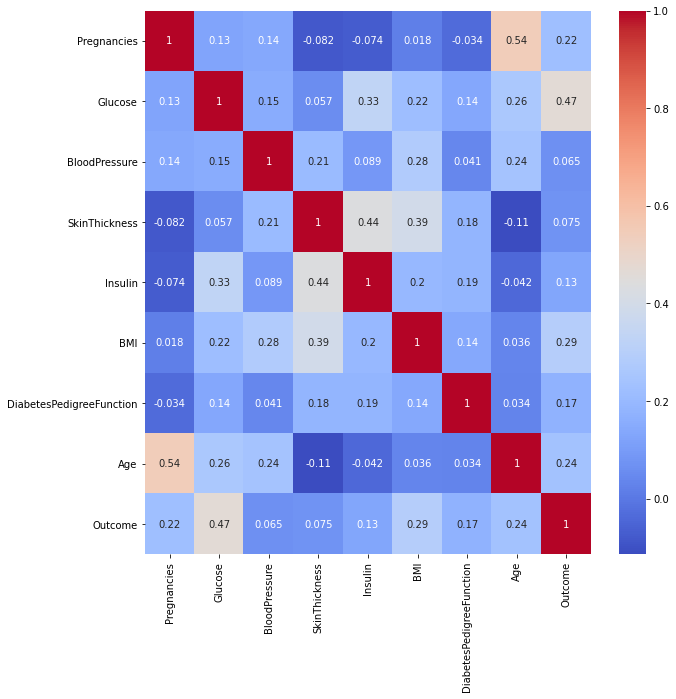

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [13]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Explore class separability

### T-SNE

In [15]:
from sklearn.manifold import TSNE

In [30]:
x_tsne = TSNE().fit_transform(X)

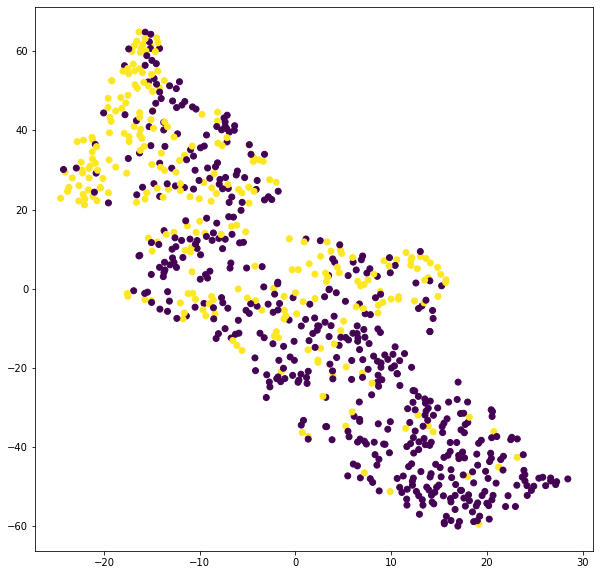

In [31]:
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y)

### PCA

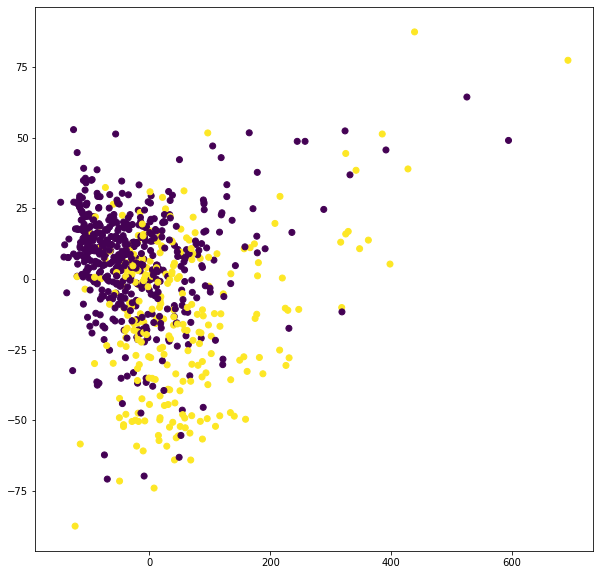

In [32]:
from sklearn.decomposition import PCA
x_pca = PCA().fit_transform(X)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)

## Null (value 0) values imputation

In [20]:
from sklearn.impute import SimpleImputer, KNNImputer

In [22]:
imputer = KNNImputer(missing_values=0)

In [27]:
X= np.concatenate((imputer.fit_transform(df.drop(['Outcome', 'Pregnancies'], axis=1)), df.Pregnancies[:,None]), axis=1)

## Classification

### Logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(max_iter=1000).fit(X,y).score(X, y)

0.78125

### SVM

In [ ]:
from sklearn.svm import SVC

In [33]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(max_iter=1000).fit(X,y).score(X, y)

0.7786458333333334

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
DecisionTreeClassifier().fit(X,y).score(X, y)

1.0

In [36]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [42]:
DecisionTreeClassifier().fit(X_train,y_train).score(X_train,y_train)

1.0

In [46]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree.score(X_test, y_test)

0.6883116883116883

In [48]:
tree.feature_importances_

array([0.26729505, 0.06904928, 0.07490858, 0.14542229, 0.1913886 ,
       0.10294922, 0.09945589, 0.0495311 ])

In [49]:
tree.get_depth()

15

## Random Forest (bagging)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
RandomForestClassifier().fit(X_train,y_train).score(X_test, y_test)

0.7662337662337663

### Param optimization

In [51]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [53]:
model = RandomForestClassifier()

In [54]:
params = {
    'n_estimators': [100, 300, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth':[5,10,15]
}

In [ ]:
model_sel = RandomizedSearchCV(model, params, n_iter=10)

In [63]:
model_sel = GridSearchCV(model, params)

In [69]:
model_sel.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [100, 300, 500]})

In [67]:
model_sel.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}

In [65]:
model_sel.best_estimator_

RandomForestClassifier(max_depth=5)

In [68]:
model_sel.best_estimator_.score(X_test, y_test)

0.7532467532467533

### Alternatively ...

In [ ]:
model = make_pipeline('imputer':KNNImputer(n_neighbors), 'scaler': StandardScaler(), 'forest':RandomForestClassifier(n_estimators))
params = {
    'forest__n_estimators': [100, 300, 500],
    'imputer__n_neighbors': range(2,5) 
}

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [71]:
try:
    from xgboost import XGBClassifier
except:
    from sklearn.ensemble import GradientBoostingClassifier as XGBClassifier

In [73]:
model = XGBClassifier()

In [74]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
model.score(X_test, y_test)

0.7727272727272727

In [80]:
params = {
    'gamma': np.linspace(0,1,5),
    'booster': ['gbtree', 'dart'],
    'max_depth': [5,10]
}

In [82]:
model_sel = GridSearchCV(model, params) 

In [83]:
model_sel.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                            

In [84]:
model_sel.best_params_

{'booster': 'gbtree', 'gamma': 1.0, 'max_depth': 5}

In [85]:
model_sel.best_estimator_.score(X_test, y_test)

0.7987012987012987

## Stacking

In [86]:
from sklearn.ensemble import StackingClassifier

In [87]:
from sklearn.naive_bayes import GaussianNB

In [92]:
clasificadores = [
        ('rf', RandomForestClassifier()),
        ('lr', LogisticRegression(max_iter=1000)),
        ('boost', model_sel.best_estimator_)
]

In [97]:
clasificador_final = LogisticRegression()

In [98]:
model = StackingClassifier(
     estimators=clasificadores, final_estimator=clasificador_final
)

In [99]:
model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('lr', LogisticRegression(max_iter=1000)),
                               ('boost',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=1.0,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_delta_step=0, max_depth=5,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=100, n_jobs=0,

In [100]:
model.score(X_test, y_test)

0.7662337662337663

## Multilayer Perceptron (Neural Networks)

In [130]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam',
                    max_iter=1000,
                    alpha=1e-3,
                    activation='relu', 
                    hidden_layer_sizes=(7,7,3))

In [131]:
clf.fit(X_train, y_train).score(X_train, y_train)

0.6335504885993485

In [118]:
clf.fit(X_train, y_train).score(X_test, y_test)

0.6753246753246753